# Project 1 - Part 2

- Zach Dawson

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [2]:
file_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRkIwH94EktrYdv19S1dFxJGuqxCb1kaXAwEKrePJOvMIlsq-bsf7OQiS4FKSgxwhb5Kb00BUFV1d14/pub?gid=834996468&single=true&output=csv"
df = pd.read_csv(file_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [5]:
# Checking for rows/columns
df.shape

(8523, 12)

In [6]:
# Checking for data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
# Checking for NaN values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Droping Outlet_Size due to lack of correlation with other columns
df.drop(columns='Outlet_Size', inplace=True)
# Checking NaN values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
# Filling the missing values of Item_Weight with the median value of the column
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)

In [11]:
# Checking for NaN values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# Checking for unique values 
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [13]:
# While checking the different object types I found these inconsistenties in the data 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
# Fixing the inconsistenties in Item_Fat_Content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
# Checking to see if the inconsistenties are fixed
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
# Finding the min, max, and mean for every numeric column
df.agg({
    "Item_Weight": ['min', 'max', 'mean'],
    "Item_Visibility": ['min', 'max', 'mean'],
    "Item_MRP": ['min', 'max', 'mean'],
    "Outlet_Establishment_Year": ['min', 'max', 'mean'],
    "Item_Outlet_Sales": ['min', 'max', 'mean']
}).round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96
mean,12.81,0.07,140.99,1997.83,2181.29


# Project 1 Part 3

## Exploratory Visuals

### Histogram

- Checking the database to see what columns in the list could be used to visualize certain features in this database.

In [16]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


- After analysing the data set I've concluded that I want to find the differences between item outlet sales by type.

- Now I'm going to pick two outlets with different types to visualize the differences.
    - `OUT049` (Supermarket Type 1)
    - `OUT010` (Grocery Store)

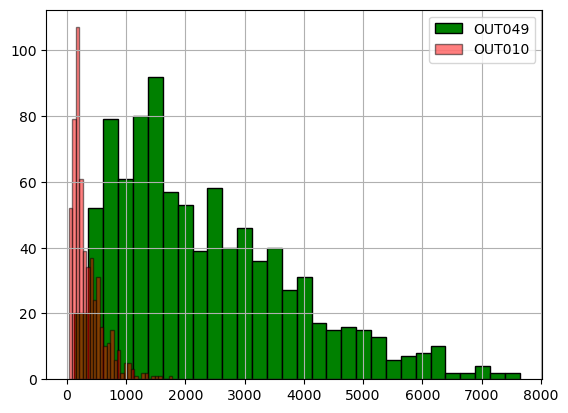

In [17]:
# Seeing the item sales from specified outlets.

# Using style to improve visualization.
plt.style.use('tableau-colorblind10')

# Creating filters so that it only visualize specified outlets.
df.loc[df['Outlet_Identifier'] == 'OUT049', 'Item_Outlet_Sales'].hist(bins=30, edgecolor='black', facecolor='green', label='OUT049')
df.loc[df['Outlet_Identifier'] == 'OUT010', 'Item_Outlet_Sales'].hist(bins=30, edgecolor='black', alpha=0.5, facecolor='red', label='OUT010')
# Using .legend() to identify outlets.
plt.legend()

- After taking a look at this graph it is apparent that `OUT049` item sales reaches higher margins than `OUT010` sales. 

### Boxplot

- Now I want to visualize the information regarding the mean, median, and mode of item sales of the specified outlets.

- We can accomplish this using `.boxplot()` to get this visualization.
    - First we will create filters assigning them to variables `outlet_49` and `outlet_10`.

In [18]:
# Creating filter to isolate OUT049 and OUT018 item sales. 
outlet_49 = df.loc[df['Outlet_Identifier']=='OUT049', 'Item_Outlet_Sales']
outlet_10 = df.loc[df['Outlet_Identifier']=='OUT010', 'Item_Outlet_Sales']

- Next will create the `.boxplot()` and customizing it to make the visuals more appealing and easy to comprehend.

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.,  9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

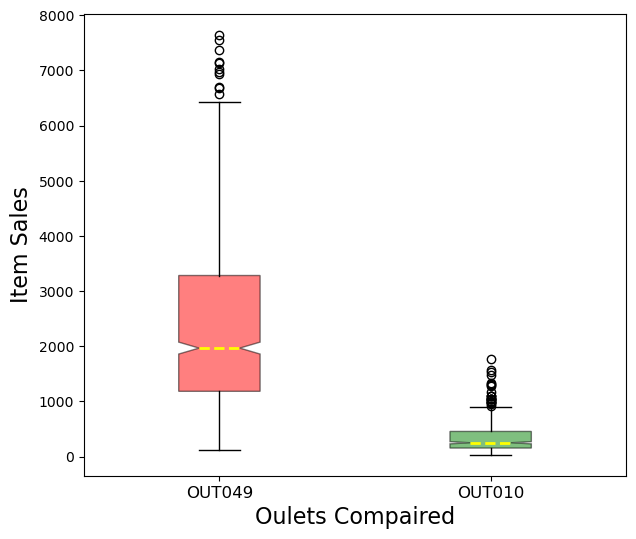

In [19]:
# Creating a boxplot to see to differences between two of the outlets of item_sales.

# Using same style as histogram.
plt.style.use('tableau-colorblind10')

# Using a combination of MATLAB-Style and Object Syntax to configure boxplot.
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
boxplots = axes.boxplot([outlet_49, outlet_10],
             notch=True,
             labels=['OUT049', 'OUT010'],
             widths=.3,
             patch_artist=True,
             medianprops=dict(linestyle='--', linewidth=2, color='Yellow'),
             boxprops=dict(linestyle='-', linewidth=1, color='Black', facecolor='Green', alpha=0.5))
boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Oulets Compaired', fontsize=16)
plt.ylabel('Item Sales', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)

- Looking at the visual above it is clear to see that `OUT049` has higher ranges and also salse but `OUT010` have more outliers as a result of the data given.

### Heat map

- Now I want to see the correlation coefficiency between the features in this dataset.
    - I will accomplish this by assigning `df.corr()` to the variable `corr` to get the correlations in the dataset.
    - Next I will use seaborns `.heatmap()` to graph the correlations found in `corr`.

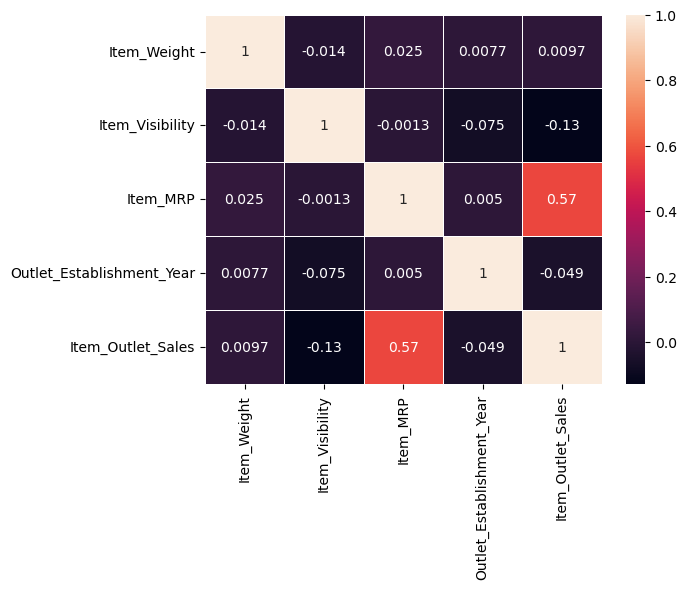

In [20]:
# Creating a heatmap.
corr = df.corr()

# I choose to keep the default style of seaborns heat map because I find that the style is already visually appealing.
# I did change the linecolor and linewidths to make the data in the heat map stand out.
ax = sns.heatmap(corr, annot=True, linecolor='White', linewidths=.7)

- After reviewing this heat map, the only two positive correltations present are, the columns positive correlation with themselves and the positive correlation between `Item_MRP` and `Item_Outlet_Sales` (which is considered a `"moderate"` correlation being between 0.5 and 0.7). 

## Exploratory Visuals